In [2]:
# Increment 1
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
import requests
import random
import numpy as np
import pandas as pd 
from PIL import Image
import matplotlib.pyplot as plt
import urllib
import cv2
import json
df = pd.read_json('drive/My Drive/Python_Project/Indian_Number_plates.json',lines=True)
pd.set_option('display.max_colwidth', -1)
del df['extras']
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # This is added back by InteractiveShellApp.init_path()


,content,annotation
0,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/77d1f81a-bee6-487c-aff2-0efa31a9925c____bd7f7862-d727-11e7-ad30-e18a56154311.jpg.jpeg,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.722084367245657, 'y': 0.5879828326180251}, {'x': 0.8684863523573201, 'y': 0.688841201716738}], 'imageWidth': 806, 'imageHeight': 466}]"
1,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/4eb236a3-6547-4103-b46f-3756d21128a9___06-Sanjay-Dutt.jpg.jpeg,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.16194331983805602, 'y': 0.850779510022271}, {'x': 0.582995951417004, 'y': 1}], 'imageWidth': 494, 'imageHeight': 449}]"
2,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/84969111-2ec3-4914-b3bb-da5aaac701e7___1.jpg.jpeg,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.082, 'y': 0.697452229299363}, {'x': 0.23, 'y': 0.8280254777070061}], 'imageWidth': 500, 'imageHeight': 314}]"
3,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/52b45060-9645-47c7-882d-b69a5bf07eff___1006372d1351343820-my-new-maruti-swift-zxi-21102012241.jpg.jpeg,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.434, 'y': 0.667377398720682}, {'x': 0.718, 'y': 0.7654584221748401}], 'imageWidth': 500, 'imageHeight': 469}]"
4,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/5d08ee4a-d8e7-4fda-8959-21f263f62c25___100923d1368191518-custom-number-plates-embossedplates1.jpg.jpeg,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.20879120879120802, 'y': 0.39076376554174}, {'x': 0.865134865134865, 'y': 0.9840142095914741}], 'imageWidth': 1001, 'imageHeight': 563}]"


In [4]:
df['points'] = df.apply(lambda row: row['annotation'][0]['points'], axis=1)
df['height'] = df.apply(lambda row: row['annotation'][0]['imageHeight'], axis=1)
df['width']  = df.apply(lambda row: row['annotation'][0]['imageWidth'], axis=1)
del df['annotation']
df.head()

,content,points,height,width
0,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/77d1f81a-bee6-487c-aff2-0efa31a9925c____bd7f7862-d727-11e7-ad30-e18a56154311.jpg.jpeg,"[{'x': 0.722084367245657, 'y': 0.5879828326180251}, {'x': 0.8684863523573201, 'y': 0.688841201716738}]",466,806
1,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/4eb236a3-6547-4103-b46f-3756d21128a9___06-Sanjay-Dutt.jpg.jpeg,"[{'x': 0.16194331983805602, 'y': 0.850779510022271}, {'x': 0.582995951417004, 'y': 1}]",449,494
2,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/84969111-2ec3-4914-b3bb-da5aaac701e7___1.jpg.jpeg,"[{'x': 0.082, 'y': 0.697452229299363}, {'x': 0.23, 'y': 0.8280254777070061}]",314,500
3,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/52b45060-9645-47c7-882d-b69a5bf07eff___1006372d1351343820-my-new-maruti-swift-zxi-21102012241.jpg.jpeg,"[{'x': 0.434, 'y': 0.667377398720682}, {'x': 0.718, 'y': 0.7654584221748401}]",469,500
4,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/5d08ee4a-d8e7-4fda-8959-21f263f62c25___100923d1368191518-custom-number-plates-embossedplates1.jpg.jpeg,"[{'x': 0.20879120879120802, 'y': 0.39076376554174}, {'x': 0.865134865134865, 'y': 0.9840142095914741}]",563,1001


In [0]:
# Creating a local directory
import os
os.mkdir("Vehicle Images")

In [6]:
# Extracting all the vehicle images based on the url's present in th dataset 
dataset = dict()
dataset["image_name"] = list()
counter = 0
for index, row in df.iterrows():
    img = urllib.request.urlopen(row["content"])
    img = Image.open(img)
    img = img.convert('RGB')
    img.save("Vehicle Images/Car_Image{}.jpeg".format(counter), "JPEG")
    dataset["image_name"].append("Car_Image{}".format(counter))
    counter += 1
print("Downloaded {} car images.".format(counter))

Downloaded 237 car images.


In [0]:
Points = []
def downloadTraining(df):
    for index, row in df.iterrows():
        resp = urllib.request.urlopen(row[0])
        im = np.array(Image.open(resp))  
        x_point_top = row[1][0]['x']*im.shape[1]
        y_point_top = row[1][0]['y']*im.shape[0]
        x_point_bot = row[1][1]['x']*im.shape[1]
        y_point_bot = row[1][1]['y']*im.shape[0]
        Points.append([int(x_point_top), int(y_point_top),int(x_point_bot), int(y_point_bot)])
downloadTraining(df)

In [8]:
main_df = pd.DataFrame([row for row in Points], columns=['xmin', 'ymin', 'xmax', 'ymax'])
main_df.head()

,xmin,ymin,xmax,ymax
0,581,273,700,320
1,79,381,288,449
2,41,219,115,259
3,217,312,359,359
4,208,219,865,553


In [9]:
images_path = 'Vehicle Images'
All_images = [images_path + str(i) + '.jpg' for i in list(range(0, 237))]
All_images[:10]

['Vehicle Images0.jpg',
 'Vehicle Images1.jpg',
 'Vehicle Images2.jpg',
 'Vehicle Images3.jpg',
 'Vehicle Images4.jpg',
 'Vehicle Images5.jpg',
 'Vehicle Images6.jpg',
 'Vehicle Images7.jpg',
 'Vehicle Images8.jpg',
 'Vehicle Images9.jpg']

In [10]:
main_df['Image_Names'] = All_images
main_df['width_of_plate'] = main_df['xmax'] - main_df['xmin']
main_df['height_of_plate'] = main_df['ymax'] - main_df['ymin']
main_df.head()

,xmin,ymin,xmax,ymax,Image_Names,width_of_plate,height_of_plate
0,581,273,700,320,Vehicle Images0.jpg,119,47
1,79,381,288,449,Vehicle Images1.jpg,209,68
2,41,219,115,259,Vehicle Images2.jpg,74,40
3,217,312,359,359,Vehicle Images3.jpg,142,47
4,208,219,865,553,Vehicle Images4.jpg,657,334


In [11]:
modified_df = pd.DataFrame()
modified_df['Image_Names'] = main_df['Image_Names']
modified_df['width_of_plate'] = main_df['width_of_plate']
modified_df['height_of_plate'] = main_df['height_of_plate']
modified_df['xmin'] = main_df['xmin']
modified_df['ymin'] = main_df['ymin']
modified_df['xmax'] = main_df['xmax']
modified_df['ymax'] = main_df['ymax']
modified_df.head()

,Image_Names,width_of_plate,height_of_plate,xmin,ymin,xmax,ymax
0,Vehicle Images0.jpg,119,47,581,273,700,320
1,Vehicle Images1.jpg,209,68,79,381,288,449
2,Vehicle Images2.jpg,74,40,41,219,115,259
3,Vehicle Images3.jpg,142,47,217,312,359,359
4,Vehicle Images4.jpg,657,334,208,219,865,553


In [12]:
# Increment-2

image_1 = cv2.imread('Vehicle Images/Car_Image0.jpeg')
cv2.rectangle(image_1, (581, 273), (700, 320), (255,0,0), 5)
cv2.imwrite('rectangle.png', image_1)

True

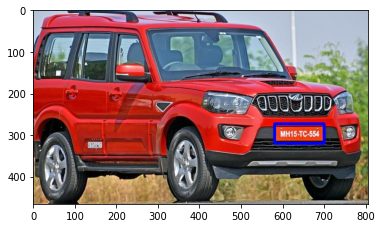

In [13]:
image = plt.imread('rectangle.png')
plt.imshow(image)
plt.show()

In [0]:
import os
os.mkdir("Plates Images")

In [15]:
dataset = dict()
dataset["Plate"] = list()
counter = 0
for index, row in df.iterrows():
  resp = urllib.request.urlopen(row[0])
  im = np.array(Image.open(resp))  
  x_point_top = row[1][0]['x']*im.shape[1]
  y_point_top = row[1][0]['y']*im.shape[0]
  x_point_bot = row[1][1]['x']*im.shape[1]
  y_point_bot = row[1][1]['y']*im.shape[0]
  carImage = Image.fromarray(im)
  plateImage = carImage.crop((x_point_top, y_point_top, x_point_bot, y_point_bot))
  img = plateImage.convert('RGB')
  img.save("Plates Images/Plate_Image{}.jpeg".format(counter), "JPEG")
  dataset["Plate"].append("Plate_Image{}".format(counter))
  counter += 1
print("Downloaded {} Plate images.".format(counter))

Downloaded 237 Plate images.


In [0]:
from google.colab.patches import cv2_imshow
def pre_processing(image) :
    img_lp = cv2.resize(image, (300, 80))
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
    cv2_imshow(img_gray_lp)
    _, img_binary_lp = cv2.threshold(img_gray_lp, 150, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_binary_lp[0:20,:] = 255
    img_binary_lp[:,0:4] = 255
    img_binary_lp[75:100,:] = 255
    img_binary_lp[:,280:300] = 255
    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]
    dimensions = [LP_WIDTH/6,LP_WIDTH/2,LP_HEIGHT/10,2*LP_HEIGHT/3]
    plt.imshow(img_binary_lp, cmap='gray')
    plt.show()
    cv2.imwrite('contour1.jpg',img_binary_lp)
    char_list = detect_contours(dimensions, img_binary_lp)
    return char_list

In [0]:
import numpy as np
import cv2
def detect_contours(dimensions, img) :
    contours, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:15]
    ii = cv2.imread('contour1.jpg')
    x_cntr_list = []
    target_contours = []
    img_res = []
    for contour in contours :
        intX, intY, intWidth, intHeight = cv2.boundingRect(contour)
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            x_cntr_list.append(intX) 
            char_copy = np.zeros((44,24))
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))
            cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)
            plt.imshow(ii, cmap='gray')
            char = cv2.subtract(255, char)
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0
            img_res.append(char_copy) 
    plt.show()
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])
    img_res = np.array(img_res_copy)
    return img_res

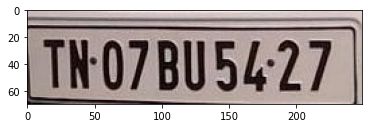

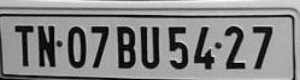

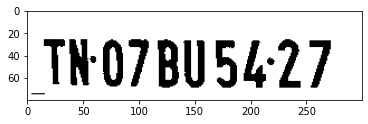

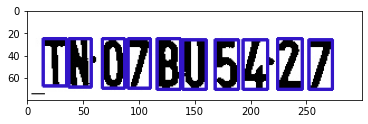

In [18]:
img = cv2.imread('Plates Images/Plate_Image8.jpeg')
plt.imshow(img)
plt.show()
char = pre_processing(img)

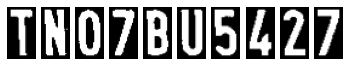

In [19]:
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(char[i], cmap='gray')
    plt.axis('off')

In [0]:
!unzip data.zip

In [21]:
## create model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten, MaxPool2D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)
train_generator = train_datagen.flow_from_directory(
        'data/train', 
        target_size=(28,28), 
        batch_size=1,
        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        'data/val', 
        target_size=(28,28),  
        class_mode='categorical')

Found 864 images belonging to 36 classes.
Found 216 images belonging to 36 classes.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D
from tensorflow.keras import optimizers
model = Sequential()
model.add(Conv2D(32, (24,24), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(36, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.00001), metrics=['accuracy'])

In [0]:
batch_size = 1
model.fit_generator(
      train_generator,
      steps_per_epoch = train_generator.samples // batch_size,
      validation_data = validation_generator, 
      validation_steps = validation_generator.samples // batch_size,
      epochs = 40 )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
864/864 [==============================] - 7s 8ms/step - loss: 3.5199 - accuracy: 0.0602 - val_loss: 3.3868 - val_accuracy: 0.2476
Epoch 2/40
864/864 [==============================] - 7s 8ms/step - loss: 3.2328 - accuracy: 0.1829 - val_loss: 2.9820 - val_accuracy: 0.3865
Epoch 3/40
864/864 [==============================] - 7s 8ms/step - loss: 2.7278 - accuracy: 0.3090 - val_loss: 2.4099 - val_accuracy: 0.5319
Epoch 4/40
864/864 [==============================] - 7s 8ms/step - loss: 2.2320 - accuracy: 0.4456 - val_loss: 1.9421 - val_accuracy: 0.6503
Epoch 5/40
864/864 [==============================] - 7s 8ms/step - loss: 1.8044 - accuracy: 0.5220 - val_loss: 1.5886 - val_accuracy: 0.7106
Epoch 6/40
864/864 [==============================] - 7s 8ms/step - loss: 1.4571 - accuracy: 0.6250 - val_loss: 1.3078 - val_accuracy: 0.7377
Epoch 7/40
864/864 [==============================] - 7s 8ms/step - loss

In [0]:
def fix_dimension(img): 
  new_img = np.zeros((28,28,3))
  for i in range(3):
    new_img[:,:,i] = img
  return new_img
  
def show_results():
    dic = {}
    characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for i,c in enumerate(characters):
        dic[i] = c

    output = []
    for i,ch in enumerate(char):
        img_ = cv2.resize(ch, (28,28))
        img = fix_dimension(img_)
        img = img.reshape(1,28,28,3)
        y_ = model.predict_classes(img)[0] 
        character = dic[y_] 
        output.append(character) 
        
    plate_number = ''.join(output)
    
    return plate_number

print(show_results())

T8078U54Z7


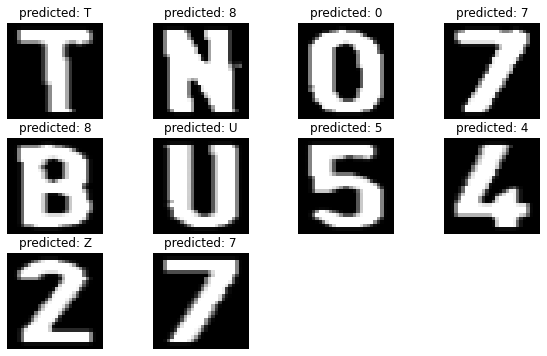

In [0]:
plt.figure(figsize=(10,6))
for i,ch in enumerate(char):
    img = cv2.resize(ch, (28,28))
    plt.subplot(3,4,i+1)
    plt.imshow(img,cmap='gray')
    plt.title(f'predicted: {show_results()[i]}')
    plt.axis('off')
plt.show()